In [16]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib

from sklearn.metrics import confusion_matrix


In [17]:
keras.utils.set_random_seed(812)

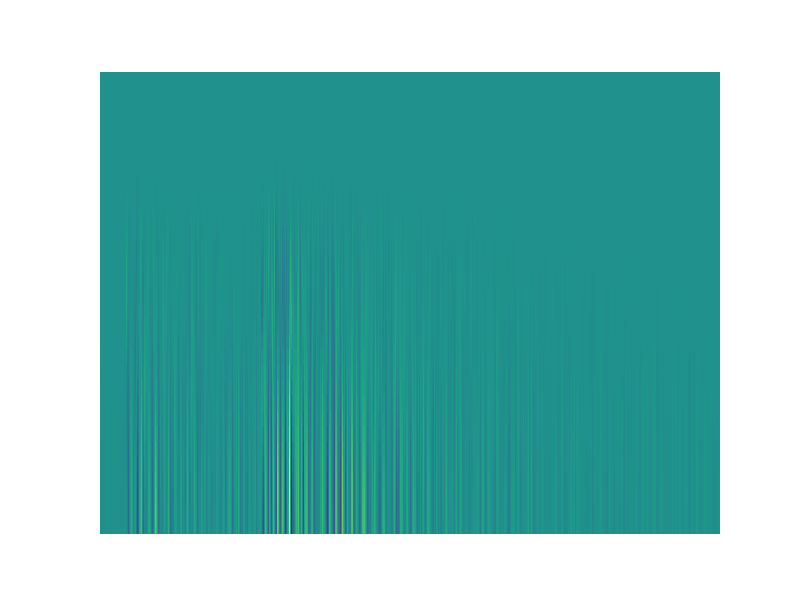

In [18]:
data_dir = pathlib.Path('C:/all/vallen/plate-dataset/images')
sand = list(data_dir.glob('sand/*'))
PIL.Image.open(str(sand[0]))

In [19]:
batch_size = 16
img_height = 600
img_width = 800

In [20]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 27857 files belonging to 4 classes.
Using 22286 files for training.


In [21]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 27857 files belonging to 4 classes.
Using 5571 files for validation.


In [22]:
class_names = train_ds.class_names
print(class_names)

['fiber', 'sand', 'sand_fd', 'sherbet']


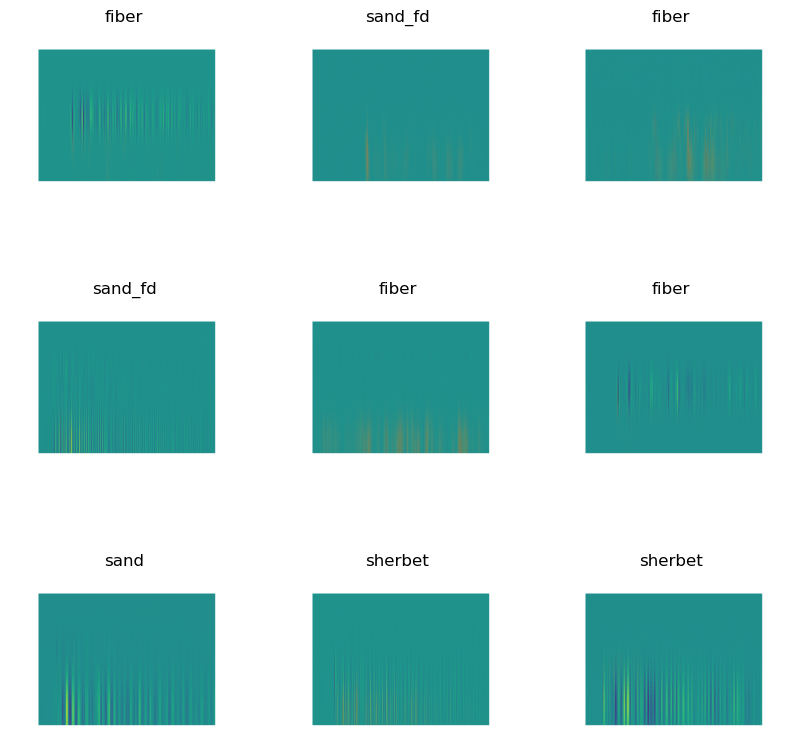

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 600, 800, 3)
(16,)


########model1_base

In [11]:

num_classes = len(class_names)
inputs = keras.Input(shape=(img_height, img_width, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [12]:
model.compile(optimizer='SGD',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 600, 800, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 600, 800, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 598, 798, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 299, 399, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 297, 397, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 148, 198, 64)     0         
 2D)                                                         

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="base_model.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    callbacks=callbacks)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(18)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
test_model = keras.models.load_model("eff.keras")
test_loss, test_acc = test_model.evaluate(val_ds)
print(f"Test accuracy: {test_acc:.3f}")

349/349 ━━━━━━━━━━━━━━━━━━━━ 33s 86ms/step - accuracy: 0.2481 - loss: 1.4777
Test accuracy: 0.245


In [97]:
pred= test_model.predict(val_ds)
len(pred)

349/349 [==============================] - 21s 60ms/step


5571

In [ ]:
c=[]
for a,b in val_ds:
    for i in range(len(b)):
        d=b[i]
        c.append(d)


In [ ]:
c=[]
p = []
for a,b in val_ds:
    pred = test_model.predict(a)
    t = pred.argmax(axis=1)
    p.append(t)
    c.append(b)
predictions = np.concatenate(p,0)
gts = np.concatenate(c,0)

matrix = confusion_matrix(gts, predictions)
matrix,gts

In [98]:
 pred.argmax(axis=1)

array([3, 3, 3, ..., 0, 3, 1], dtype=int64)

In [19]:
matrix = confusion_matrix(c, pred.argmax(axis=1))
matrix

array([[390, 246, 382, 348],
       [362, 266, 381, 357],
       [388, 269, 395, 395],
       [362, 231, 406, 393]], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

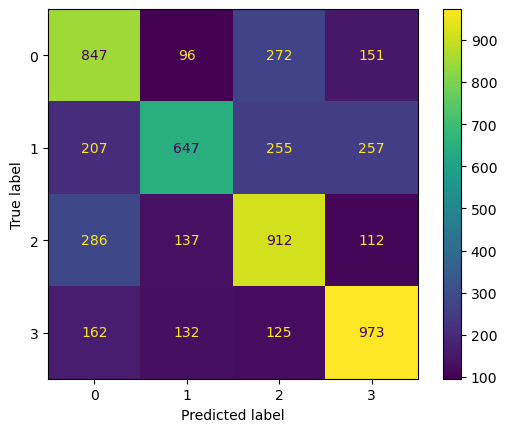

In [108]:
#cm = confusion_matrix(c, pred.argmax(axis=1), labels=val_ds.class_names)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
                              
disp.plot()

plt.show()

In [26]:
from keras.models import load_model
from keras.preprocessing import image

In [32]:
i = image.load_img(r'C:\all\vallen\plate-dataset\images\sand\sand (1).png', target_size=(600,800))
i = image.img_to_array(i)/255.0
i = i.reshape(1, 600,800,3)
p = model.predict(i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [33]:
p

array([[0.1416768 , 0.02580967, 0.640181  , 0.19233254]], dtype=float32)

In [36]:
dic = {0 : 'fiber', 1 : 'sand', 2 : 'sand_fd', 1 : 'sherbet'}

model = load_model("eff.keras")

model.make_predict_function()

def predict_label(img_path):
	i = image.load_img(img_path, target_size=(600,800))
	i = image.img_to_array(i)/255.0
	i = i.reshape(1, 600,800,3)
	p = model.predict(i)
	return dic[np.argmax(p[0])]

In [37]:
predict_label(r'C:\all\vallen\plate-dataset\images\sand\sand (1).png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


'sand_fd'

vgg

transfer learning

In [33]:
conv_base = keras.applications.vgg19.VGG19(
    weights="imagenet",
    include_top=False,
    input_shape=(600, 800, 3))

In [34]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 600, 800, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 600, 800, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 600, 800, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 300, 400, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 300, 400, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 300, 400, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 150, 200, 128)     0     

freezing

In [ ]:
tf_keras.applications.EfficientNetB7(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    **kwargs
)

In [61]:
conv_base  = keras.applications.EfficientNetB0(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

16705208/16705208 [==============================] - 0s 0us/step


In [62]:
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


no freezing

dont run

In [39]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


weights from scrtach

VGG16 and VGG19

In [50]:
conv_base  = keras.applications.vgg19.VGG19(
       weights=None,
    include_top=False)
conv_base.trainable = True

In [51]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 32


In [44]:
conv_base.trainable = True
for layer in conv_base.layers[:10]:
    layer.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 18


In [52]:

inputs = keras.Input(shape=(600, 800, 3))
x = layers.Rescaling(1./255)(inputs)
x = keras.applications.vgg19.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model2 = keras.Model(inputs, outputs)
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer='SGD',
              
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="19_noTransfer_noFreezing.keras",
        save_best_only=True,
        monitor="val_loss")
]
hist = model2.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    callbacks=callbacks)

Epoch 1/20
 105/1393 [=>............................] - ETA: 31:44 - loss: 1.6471 - accuracy: 0.2565

efficientnetB0 to B7

In [19]:
conv_base=keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,

)
 

In [26]:
conv_base.trainable = True
for layer in conv_base.layers[:150]:
    layer.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 78


In [21]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 211


In [12]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input

In [31]:

inputs = keras.Input(shape=(600, 800, 3))
#x = layers.Resizing(512, 512)(inputs)
x = layers.Rescaling(1./255)(inputs)
#x = keras.applications.efficientnet.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model2 = keras.Model(inputs, outputs)
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              
              metrics=["accuracy"])

In [32]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="b0_noTransfer_noFreezing.keras",
        save_best_only=True,
        monitor="val_loss")
]
hist = model2.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    callbacks=callbacks)

Epoch 1/20
1393/1393 [==============================] - ETA: 0s - loss: 1.5616 - accuracy: 0.2498

TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.

In [ ]:
keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="xception",
)

In [10]:
from tensorflow.keras.applications import EfficientNetB5
model = EfficientNetB5(weights='imagenet')

123465288/123465288 [==============================] - 1s 0us/step


In [51]:
model = EfficientNetB0(include_top=False, weights='imagenet')


In [53]:
model = EfficientNetB0(weights='imagenet', drop_connect_rate=0.4)

TypeError: EfficientNetB0() got an unexpected keyword argument 'drop_connect_rate'

In [11]:
IMG_SIZE = 456
BATCH_SIZE = 2

In [12]:
size = (IMG_SIZE, IMG_SIZE)
train_ds = train_ds.map(lambda image, label: (tf.image.resize(image, size), label))
val_ds = val_ds.map(lambda image, label: (tf.image.resize(image, size), label))

In [13]:
model = EfficientNetB5(

    weights=None,
    classes=4,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

epochs = 40  # @param {type: "slider", min:10, max:100}
#hist = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Model: "efficientnetb5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 456, 456, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 456, 456, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 456, 456, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                     

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="effB5_noTransfer_noFreezing.keras",
        save_best_only=True,
        monitor="val_loss")
]
hist = model.fit(
    train_ds,
    batch_size= 2 ,
    epochs=20,
    validation_data=val_ds,
    callbacks=callbacks)

Epoch 1/20


In [105]:
def Eff_B7_NS():
    model_EfficientNetB7_NS = Sequential([EfficientNetB7(input_shape=(IMG_SIZE,IMG_SIZE,3),weights=None,include_top=False),
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(128,activation='relu'),
                                 tf.keras.layers.Dense(64,activation='relu'),
                                 tf.keras.layers.Dense(4,activation='softmax')])               
    model_EfficientNetB7_NS.compile(optimizer='Adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
    
    
    return model_EfficientNetB7_NS

In [110]:
AUTO = tf.data.experimental.AUTOTUNE
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


In [111]:
with strategy.scope():
    model_Eff_B7_NS=Eff_B7_NS()
    
model_Eff_B7_NS.summary()
#del model_Eff_B7_NS

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb7 (Functional)     │ (None, 19, 19, 2560)   │    64,097,687 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2560)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       327,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,434,011 (245.80 MB)

 Trainable params: 64,123,284 (244.61 MB)

 Non-trainable params: 310,727 (1.19 MB)

In [112]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="effB7_noTransfer_noFreezing.keras",
        save_best_only=True,
        monitor="val_loss")
]
hist = model_Eff_B7_NS.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    callbacks=callbacks)

Epoch 1/20


ResourceExhaustedError: Graph execution error:

Detected at node sequential_1/efficientnetb7_1/block6c_se_excite_1/Mul defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\bensid28\AppData\Local\Temp\1\ipykernel_13472\3752714290.py", line 7, in <module>

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 320, in fit

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 51, in train_step

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\layer.py", line 899, in __call__

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\models\sequential.py", line 213, in call

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\models\functional.py", line 182, in call

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\ops\function.py", line 171, in _run_through_graph

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\models\functional.py", line 584, in call

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\layer.py", line 899, in __call__

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\models\functional.py", line 182, in call

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\ops\function.py", line 171, in _run_through_graph

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\models\functional.py", line 584, in call

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\layer.py", line 899, in __call__

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\merging\base_merge.py", line 226, in call

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\merging\multiply.py", line 51, in _merge_function

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\ops\numpy.py", line 5837, in multiply

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\sparse.py", line 627, in sparse_wrapper

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\numpy.py", line 499, in multiply

OOM when allocating tensor with shape[16,19,19,2304] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu
	 [[{{node sequential_1/efficientnetb7_1/block6c_se_excite_1/Mul}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_one_step_on_iterator_3963019]

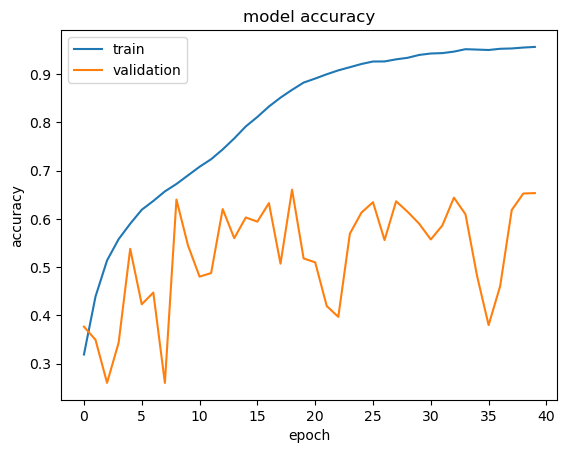

In [61]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [63]:
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test accuracy: {test_acc:.3f}")

349/349 ━━━━━━━━━━━━━━━━━━━━ 34s 96ms/step - accuracy: 0.6577 - loss: 1.6758
Test accuracy: 0.653


In [64]:
#cm = confusion_matrix(c, pred.argmax(axis=1), labels=val_ds.class_names)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [65]:
c=[]
p = []
for a,b in val_ds:
    pred = model.predict(a)
    t = pred.argmax(axis=1)
    p.append(t)
    c.append(b)
predictions = np.concatenate(p,0)
gts = np.concatenate(c,0)

matrix = confusion_matrix(gts, predictions)
matrix,gts

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━

(array([[907, 124, 204, 131],
        [171, 953, 122, 120],
        [300, 144, 911,  92],
        [204, 234,  85, 869]], dtype=int64),
 array([1, 2, 2, ..., 3, 2, 0]))

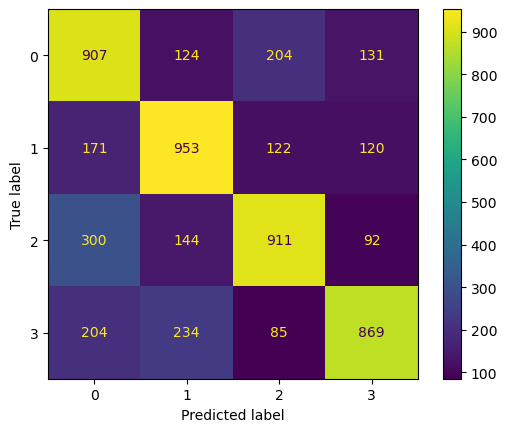

In [66]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
                              
disp.plot()

plt.show()

In [67]:
model.save("EfficientNet_B0_NoTransferLearning.keras")

In [102]:
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    model = EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = True

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

    # Compile
    model = keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [103]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="efficientNet7_nothing.keras",
        save_best_only=True,
        monitor="val_loss")
]
history2 = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    callbacks=callbacks)

Epoch 1/20


ResourceExhaustedError: Graph execution error:

Detected at node efficientnetb7_1/block5i_activation_1/mul_1 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\bensid28\AppData\Local\Temp\1\ipykernel_13472\1502782817.py", line 7, in <module>

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 320, in fit

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 51, in train_step

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\layer.py", line 899, in __call__

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\models\functional.py", line 182, in call

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\ops\function.py", line 171, in _run_through_graph

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\models\functional.py", line 584, in call

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\layer.py", line 899, in __call__

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\activations\activation.py", line 32, in call

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\activations\activations.py", line 277, in silu

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\ops\nn.py", line 216, in silu

  File "C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 42, in silu

OOM when allocating tensor with shape[16,38,38,1344] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu
	 [[{{node efficientnetb7_1/block5i_activation_1/mul_1}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_one_step_on_iterator_3798998]

In [83]:
def unfreeze_model(model):
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-20:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    optimizer = keras.optimizers.Adam(learning_rate=1e-5)
    model.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )


unfreeze_model(model)

epochs = 4  # @param {type: "slider", min:4, max:10}
#hist = model.fit(train_ds, epochs=epochs, validation_data=val_ds)
#plot_hist(hist)

In [ ]:
plot_hist(hist)

In [70]:
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test accuracy: {test_acc:.3f}")

349/349 ━━━━━━━━━━━━━━━━━━━━ 38s 107ms/step - accuracy: 0.6708 - loss: 1.5873
Test accuracy: 0.672


In [71]:
c=[]
p = []
for a,b in val_ds:
    pred = model.predict(a)
    t = pred.argmax(axis=1)
    p.append(t)
    c.append(b)
predictions = np.concatenate(p,0)
gts = np.concatenate(c,0)

matrix = confusion_matrix(gts, predictions)
matrix,gts

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━

(array([[ 858,  136,  227,  145],
        [ 119, 1002,  117,  128],
        [ 270,  149,  938,   90],
        [ 165,  198,   85,  944]], dtype=int64),
 array([0, 0, 1, ..., 1, 3, 2]))

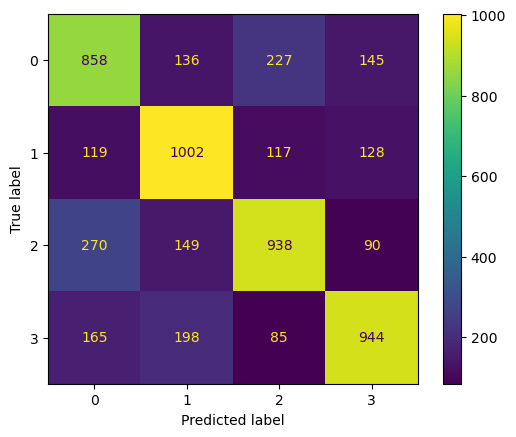

In [72]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
                              
disp.plot()

plt.show()

In [73]:
model.save("EfficientNet_B0_freezing_4epochs.keras")

In [84]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="efficientNet7_freezing.keras",
        save_best_only=True,
        monitor="val_loss")
]
history2 = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    callbacks=callbacks)

Epoch 1/20
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 5400s 4s/step - accuracy: 0.2712 - loss: 3.9129 - val_accuracy: 0.2962 - val_loss: 1.9547
Epoch 2/20
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 5098s 4s/step - accuracy: 0.2746 - loss: 3.3608 - val_accuracy: 0.3046 - val_loss: 1.6790
Epoch 3/20
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 5101s 4s/step - accuracy: 0.2739 - loss: 3.1756 - val_accuracy: 0.3048 - val_loss: 1.6804
Epoch 4/20
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 5167s 4s/step - accuracy: 0.2797 - loss: 3.1204 - val_accuracy: 0.3211 - val_loss: 1.6196
Epoch 5/20
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 5177s 4s/step - accuracy: 0.2740 - loss: 3.0013 - val_accuracy: 0.3326 - val_loss: 1.5350
Epoch 6/20
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 5108s 4s/step - accuracy: 0.2741 - loss: 2.9657 - val_accuracy: 0.2849 - val_loss: 1.7811
Epoch 7/20
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 5116s 4s/step - accuracy: 0.2813 - loss: 2.7152 - val_accuracy: 0.3183 - val_loss: 1.9145
Epoch 8/20
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 5105s 4s/step - accuracy: 0.2710 -

KeyboardInterrupt: 

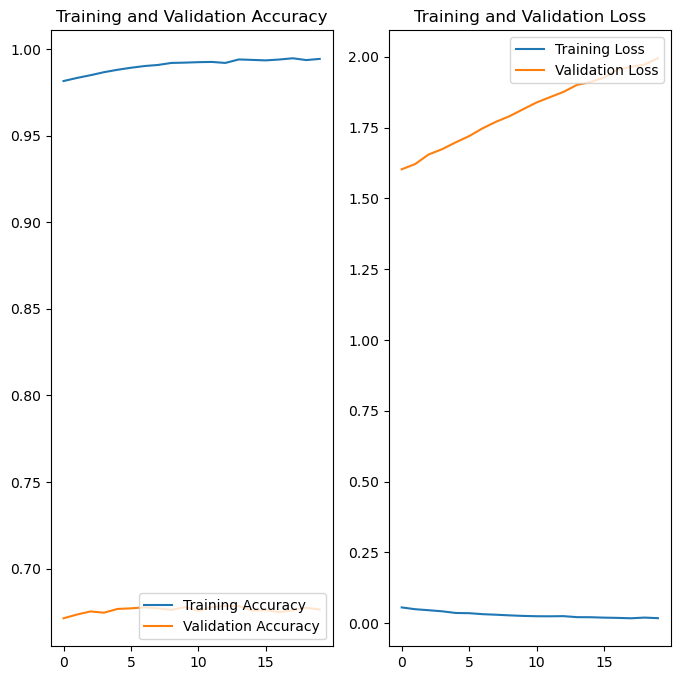

In [76]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [77]:
test_model2 = keras.models.load_model(
    "efficientNet0_freezing.keras")
test_loss, test_acc = test_model2.evaluate(val_ds)
print(f"Test accuracy: {test_acc:.3f}")

349/349 ━━━━━━━━━━━━━━━━━━━━ 36s 96ms/step - accuracy: 0.6729 - loss: 1.6139
Test accuracy: 0.671


In [46]:
pred2= test_model2.predict(val_ds)

349/349 [==============================] - 117s 334ms/step


In [116]:
val_ds1 = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,

  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 27857 files belonging to 4 classes.
Using 5571 files for validation.


In [117]:
c=[]
p = []
for a,b in val_ds1:
    pred = test_model2.predict(a,verbose=0)
    t = pred.argmax(axis=1)
    p.append(t)
    c.append(b)
predictions = np.concatenate(p,0)
gts = np.concatenate(c,0)

matrix = confusion_matrix(gts, predictions)
matrix,gts

(array([[1254,   56,   22,   34],
        [ 978,  231,   27,  130],
        [ 997,   73,  337,   40],
        [ 640,  124,   65,  563]], dtype=int64),
 array([0, 1, 1, ..., 2, 3, 3]))

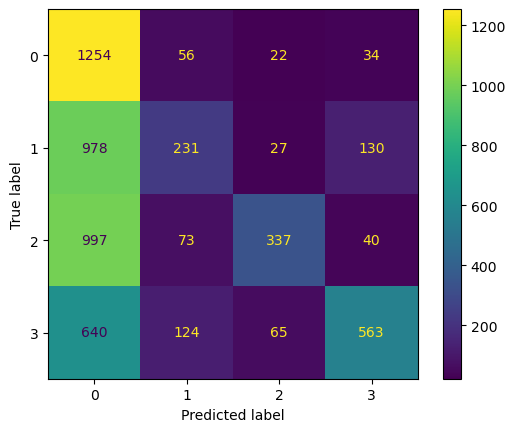

In [118]:
#cm = confusion_matrix(c, pred.argmax(axis=1), labels=val_ds.class_names)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
                              
disp.plot()

plt.show()

In [47]:
pred2

array([[5.18248476e-13, 1.44475140e-04, 1.37871587e-06, 9.99854088e-01],
       [9.99724686e-01, 1.25986393e-04, 1.16401076e-04, 3.29090763e-05],
       [9.99941468e-01, 3.06429793e-05, 2.79467240e-05, 4.26275282e-09],
       ...,
       [8.76157701e-01, 1.18382737e-01, 5.45776682e-03, 1.85419424e-06],
       [1.10950484e-03, 4.45231817e-05, 3.07303649e-09, 9.98845935e-01],
       [9.99991655e-01, 1.46127491e-06, 6.73704926e-06, 7.03616152e-08]],
      dtype=float32)

In [82]:
c=[]
for a,b in val_ds:
    for i in range(len(b)):
        d=b[i]
        c.append(d)


In [81]:
val_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 600, 800, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [65]:
len(c)

5571

In [71]:
pred2.argmax(axis=1)

array([3, 0, 0, ..., 0, 3, 0], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix

In [68]:
matrix = confusion_matrix(c, pred2.argmax(axis=1))

In [69]:
matrix

array([[966, 121, 102, 177],
       [948, 108, 110, 200],
       [988, 149, 109, 201],
       [967, 106, 130, 189]], dtype=int64)

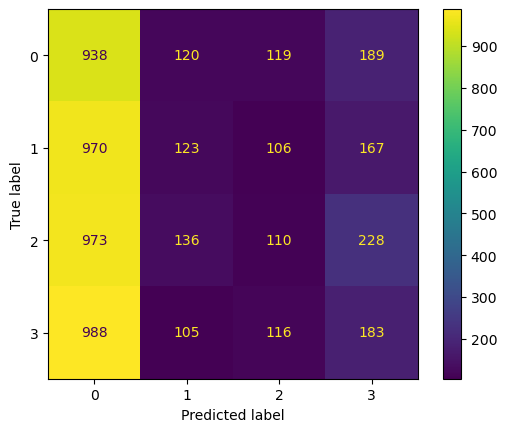

In [55]:
#cm = confusion_matrix(c, pred.argmax(axis=1), labels=val_ds.class_names)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
                              
disp.plot()

plt.show()

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

finetuning

In [132]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [133]:
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 6


In [131]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [134]:
inputs = keras.Input(shape=(600, 800, 3))
x = layers.Rescaling(1./255)(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model2 = keras.Model(inputs, outputs)
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

In [135]:


callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    callbacks=callbacks)

Epoch 1/50
1393/1393 [==============================] - 226s 162ms/step - loss: 0.1491 - accuracy: 0.9465 - val_loss: 2.1254 - val_accuracy: 0.5581
Epoch 2/50
1393/1393 [==============================] - 228s 164ms/step - loss: 0.1396 - accuracy: 0.9492 - val_loss: 2.3740 - val_accuracy: 0.5708
Epoch 3/50
1393/1393 [==============================] - 228s 163ms/step - loss: 0.1312 - accuracy: 0.9518 - val_loss: 2.3026 - val_accuracy: 0.5762
Epoch 4/50
1393/1393 [==============================] - 228s 163ms/step - loss: 0.1028 - accuracy: 0.9634 - val_loss: 2.6979 - val_accuracy: 0.5611
Epoch 5/50
1393/1393 [==============================] - 227s 163ms/step - loss: 0.0959 - accuracy: 0.9649 - val_loss: 2.5993 - val_accuracy: 0.5574
Epoch 6/50
1393/1393 [==============================] - 228s 163ms/step - loss: 0.0927 - accuracy: 0.9660 - val_loss: 2.5025 - val_accuracy: 0.5690
Epoch 7/50
1393/1393 [==============================] - 227s 163ms/step - loss: 0.0896 - accuracy: 0.9672 - val_

KeyboardInterrupt: 

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'epochs' is not defined

In [136]:
test_model3 = keras.models.load_model(
    "fine_tuning.keras")
test_loss, test_acc = test_model3.evaluate(val_ds)
print(f"Test accuracy: {test_acc:.3f}")

349/349 [==============================] - 22s 63ms/step - loss: 2.1254 - accuracy: 0.5581
Test accuracy: 0.558


In [137]:
c=[]
p = []
for a,b in val_ds:
    pred = test_model3.predict(a,verbose=0)
    t = pred.argmax(axis=1)
    p.append(t)
    c.append(b)
predictions = np.concatenate(p,0)
gts = np.concatenate(c,0)

matrix = confusion_matrix(gts, predictions)
matrix,gts

(array([[686, 174, 392, 114],
        [181, 683, 335, 167],
        [228, 184, 906, 129],
        [129, 213, 216, 834]], dtype=int64),
 array([2, 3, 2, ..., 3, 1, 2]))

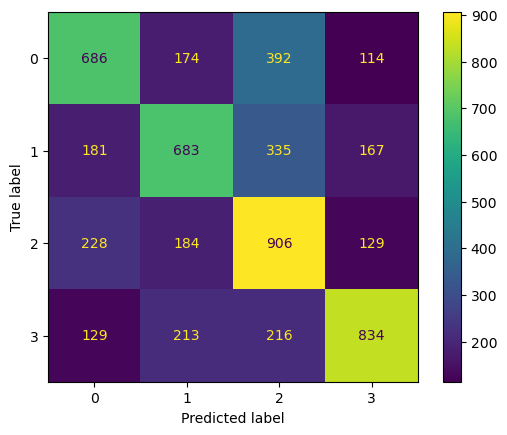

In [138]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
                              
disp.plot()

plt.show()